
# PRUEBA DE SELECCIÓN - DATA SCIENCE – Claro Insurance


**Andrés Amaya Chaves**

(A) Se realiza importación de los paquetes necesarios para desarrollar el código.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats
import seaborn as sns
import warnings
import statistics as stats
import itertools as it
from google.colab import drive 

from scipy import stats as sts
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.offline as pyoff
import plotly.graph_objs as go
from scipy.spatial.distance import cdist
import warnings

warnings.filterwarnings("ignore")

(B) Se leen los datos desde un repositorio personal en GitHub, el cual permanecerá público únicamente mientras se realiza la calificación de la presente prueba para garantizar el acceso desde este notebook. Usando esta opción no se requiere ninguna autenticación al ejecutar el Notebook.

In [3]:
Cliente = pd.read_csv('https://raw.githubusercontent.com/andresamayachaves/PruebaDataScience/main/Cliente.csv', encoding= 'unicode_escape')
DetalleOrden = pd.read_csv('https://raw.githubusercontent.com/andresamayachaves/PruebaDataScience/main/DetalleOrden.csv', encoding= 'unicode_escape') 
Orden = pd.read_csv('https://raw.githubusercontent.com/andresamayachaves/PruebaDataScience/main/Orden.csv', encoding= 'unicode_escape')     
Producto = pd.read_csv('https://raw.githubusercontent.com/andresamayachaves/PruebaDataScience/main/Producto.csv', encoding= 'unicode_escape')   


In [4]:
# Exploración de las 5 primeras líneas de cada tabla & su longitud, para dar un vistazo a la información.
Cliente.head(5)

,ID_Cliente,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME
0,C001,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette
1,C002,Amica Models & Co.,011-4988555,Via Monte Bianco 34,NaN,Torino,NaN,10100,Italy,EMEA,Accorti,Paolo
2,C003,"Anna's Decorations, Ltd",299368555,201 Miller Street,Level 15,North Sydney,NSW,2060,Australia,APAC,O'Hara,Anna
3,C004,Atelier graphique,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,EMEA,Schmitt,Carine
4,C005,"Australian Collectables, Ltd",61-9-3844-6555,7 Allen Street,NaN,Glen Waverly,Victoria,3150,Australia,APAC,Connery,Sean


In [5]:
DetalleOrden.head(5)

,ORDERNUMBER,ID_Cliente,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,PRODUCTCODE,DEALSIZE
0,10107,C046,30,95.70,2,2871.00,S10_1678,Small
1,10121,C068,34,81.35,5,2765.90,S10_1678,Small
2,10134,C048,41,94.74,2,3884.34,S10_1678,Medium
3,10145,C087,45,83.26,6,3746.70,S10_1678,Medium
4,10159,C024,49,100.00,14,5205.27,S10_1678,Medium


In [6]:
Orden.head(5)

,ORDERNUMBER,ORDERDATE,DAY_ID,QTR_ID,MONTH_ID,YEAR_ID,STATUS
0,10100,1/06/2003 0:00,6,1,1,2003,Shipped
1,10101,1/09/2003 0:00,9,1,1,2003,Shipped
2,10102,1/10/2003 0:00,10,1,1,2003,Shipped
3,10103,1/29/2003 0:00,29,1,1,2003,Shipped
4,10104,1/31/2003 0:00,31,1,1,2003,Shipped


In [7]:
Producto.head(5)

,PRODUCTCODE,PRODUCTLINE,MSRP
0,S10_1678,Motorcycles,95
1,S10_1949,Classic Cars,214
2,S10_2016,Motorcycles,118
3,S10_4698,Motorcycles,193
4,S10_4757,Classic Cars,136


In [8]:
({'LenOrden':len(Orden),'LenCliente':len(Cliente),'LenDetalleOrden':len(DetalleOrden),'LenProducto':len(Producto)})

{'LenCliente': 92,
 'LenDetalleOrden': 2823,
 'LenOrden': 307,
 'LenProducto': 109}

# (1) Se procede al análisis descriptivo

(1A) Productos más vendidos. Productos menos vendidos. (En cada caso se ecploró hasta el 3er valor distinto)

In [9]:
# Exploración de la proporción de valores vacíos en cada una de las tablas
pd.set_option('display.max_columns', None)
print(Orden.isnull().mean())
print(Cliente.isnull().mean())
print(DetalleOrden.isnull().mean())
print(Producto.isnull().mean())

CantidadProducto = DetalleOrden.groupby('PRODUCTCODE').agg({'QUANTITYORDERED': lambda x:x.sum()}).sort_values(by = ['PRODUCTCODE'], ascending = False)
CantProd = pd.merge(Producto, CantidadProducto, how = "left", on = "PRODUCTCODE").sort_values(by = 'QUANTITYORDERED', ascending = False)

ORDERNUMBER    0.0
ORDERDATE      0.0
DAY_ID         0.0
QTR_ID         0.0
MONTH_ID       0.0
YEAR_ID        0.0
STATUS         0.0
dtype: float64
ID_Cliente          0.000000
CUSTOMERNAME        0.000000
PHONE               0.000000
ADDRESSLINE1        0.000000
ADDRESSLINE2        0.902174
CITY                0.000000
STATE               0.500000
POSTALCODE          0.032609
COUNTRY             0.000000
TERRITORY           0.413043
CONTACTLASTNAME     0.000000
CONTACTFIRSTNAME    0.000000
dtype: float64
ORDERNUMBER        0.0
ID_Cliente         0.0
QUANTITYORDERED    0.0
PRICEEACH          0.0
ORDERLINENUMBER    0.0
SALES              0.0
PRODUCTCODE        0.0
DEALSIZE           0.0
dtype: float64
PRODUCTCODE    0.0
PRODUCTLINE    0.0
MSRP           0.0
dtype: float64


In [10]:
CantProd.rename(columns={'ORDERNUMBER':'SOLD_ITEMS_QUANTITY'}, inplace=True)
CantProd.head(10)

,PRODUCTCODE,PRODUCTLINE,MSRP,QUANTITYORDERED
39,S18_3232,Classic Cars,169,1774
76,S24_3856,Classic Cars,140,1052
50,S18_4600,Trucks and Buses,121,1031
106,S700_4002,Planes,74,1029
14,S12_4473,Trucks and Buses,118,1024
77,S24_3949,Planes,68,1008
91,S50_1341,Vintage Cars,43,999
16,S18_1097,Trucks and Buses,116,999
29,S18_2432,Trucks and Buses,60,998
18,S18_1342,Vintage Cars,102,997


In [11]:
CantProd.tail(10)

,PRODUCTCODE,PRODUCTLINE,MSRP,QUANTITYORDERED
13,S12_3990,Classic Cars,79,800
32,S18_2795,Vintage Cars,168,789
58,S24_1785,Planes,109,784
71,S24_3191,Classic Cars,85,779
48,S18_4409,Vintage Cars,92,750
30,S18_2581,Planes,84,746
78,S24_3969,Vintage Cars,41,745
26,S18_2248,Vintage Cars,60,743
54,S24_1046,Classic Cars,73,724
53,S18_4933,Classic Cars,71,714


In [12]:
print('---------------------------------------')
print("De los ", len(Producto['PRODUCTCODE']), "productos disponibles, \
aquel con la mayor cantidad de unidades vendidas corresponde al siguiente:")
print(CantProd.head(1))

print('---------------------------------------')
print("De los ", len(Producto['PRODUCTCODE']), "productos disponibles, \
aquel con la menor cantidad de unidades vendidas corresponde al siguiente:")
print(CantProd.tail(1))
print('---------------------------------------')

---------------------------------------
De los  109 productos disponibles, aquel con la mayor cantidad de unidades vendidas corresponde al siguiente:
   PRODUCTCODE   PRODUCTLINE  MSRP  QUANTITYORDERED
39    S18_3232  Classic Cars   169             1774
---------------------------------------
De los  109 productos disponibles, aquel con la menor cantidad de unidades vendidas corresponde al siguiente:
   PRODUCTCODE   PRODUCTLINE  MSRP  QUANTITYORDERED
53    S18_4933  Classic Cars    71              714
---------------------------------------


(1B) Histograma volumen de compras por cada cliente, cantidad total ordenada durante todo el periodo de estudio. Media, mediana, desviación estándar, varianza, moda (μ, median, σ, σ^2, mode)

{'mu': 30.68, 'Mediana': 26.0, 'Sigma': 30.93, 'Varianza': 956.94, 'Moda': 26}


(0.0, 24.0)

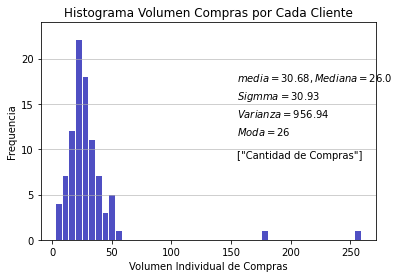

In [13]:
q = DetalleOrden.groupby('ID_Cliente').agg('count')   # Cantidad de compras efectuada por cada cliente
q = q['QUANTITYORDERED']

mu       = round(stats.mean(q),2)
median   = round(stats.median(q),2)
sigmma   = round(stats.stdev(q),2)
variance = round(stats.variance(q),2)
mode     = round(stats.mode(q),2)

print({'mu':mu,'Mediana':median, 'Sigma':sigmma,'Varianza':variance, 'Moda':mode})

hist, _ = np.histogram(q, range=(0, q.max()), bins=q.max() + 1) # Construye el Histograma

# Configura la visualización del histograma
n, bins, patches = plt.hist(x=q, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.rcParams["figure.figsize"] = (9,7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Volumen Individual de Compras')
plt.ylabel('Frequencia')
plt.title('Histograma Volumen Compras por Cada Cliente')
plt.text(155, 17.5, r'$media=%s, Mediana=%s$'%(mu,median))
plt.text(155, 15.5, r'$Sigmma=%s$'%(sigmma))
plt.text(155, 13.5, r'$Varianza=%s$'%(variance))
plt.text(155, 11.5, r'$Moda=%s$'%(mode))
plt.text(155, 9, '["Cantidad de Compras"]')

maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 8 if maxfreq % 10 else maxfreq + 10)


(1C) Identificación de los clientes con mayor volumen de compras. Se observan datos bastante excéntricos por encima de 150 compras, entonces se filtra para cantidades superiores a este valor.

In [14]:
qq = pd.DataFrame(q)
qFil = qq[qq['QUANTITYORDERED']>150]

ClientesSup = pd.merge(qFil, Cliente, how = "left", on = "ID_Cliente")
ClientesSup

,ID_Cliente,QUANTITYORDERED,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME
0,C034,259,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego
1,C057,180,Mini Gifts Distributors Ltd.,4155551450,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie


(1D) Distribución del monto de ventas en el tiempo. Mes con máximo en ventas, mes con mínimo en ventas. Total acumulado de ventas.


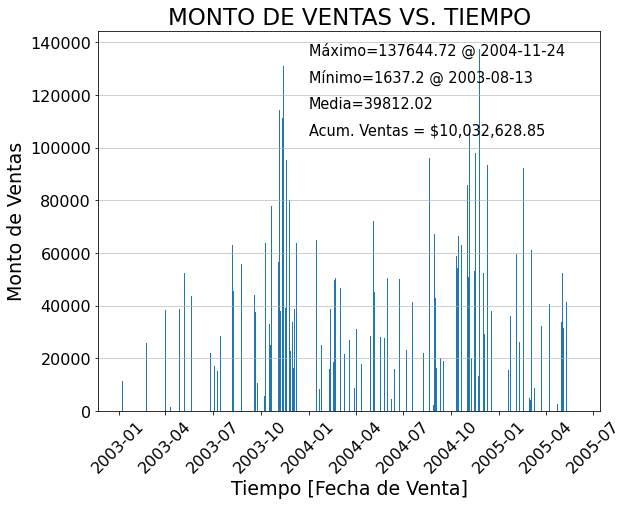

In [15]:
OrdenCompleta = pd.merge(DetalleOrden, Orden, how = "left", on = "ORDERNUMBER")
OrdenCompleta['ORDERDATE'] = pd.to_datetime(OrdenCompleta['ORDERDATE'])
OrdenGrupo = OrdenCompleta.groupby('ORDERDATE').agg({'SALES':lambda x: x.sum()}).sort_values(by="ORDERDATE")

OrdenGrupo = pd.DataFrame({'ORDERDATE': OrdenGrupo.index, 'SALES': OrdenGrupo['SALES']})
OrdenGrupo.reset_index(drop=True)

pd.set_option('max_rows', 30)

VentaMax, VentaMin, VentaMedia = max(OrdenGrupo['SALES']),min((OrdenGrupo['SALES'])), round(OrdenGrupo['SALES'].mean(),2)
TotalVentas = "${:,.2f}".format(round(sum(OrdenCompleta['SALES']),2))

MaxDate = OrdenGrupo[OrdenGrupo['SALES']==VentaMax]['ORDERDATE']
MinDate = OrdenGrupo[OrdenGrupo['SALES']==VentaMin]['ORDERDATE']

MaxDate = pd.to_datetime(MaxDate)
MinDate = pd.to_datetime(MinDate)

MaxDate = MaxDate.dt.date.values[0]       # + "-" + str(MaxDate.dt.month) +str(MaxDate.dt.year) #[-48:-36])  # , '%-d/%-m/%-y') ##[6:16]
MinDate = MinDate.dt.date.values[0]         #.dt.strftime('%/d/%/m/%y %I:%M')#[7:17]    #RFEVISAR FORMATO!! ///////////////

plt.bar(OrdenGrupo['ORDERDATE'], OrdenGrupo['SALES'], )
plt.rcParams["figure.figsize"] = (5,8)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tiempo [Fecha de Venta]', fontsize = 19)
plt.ylabel('Monto de Ventas', fontsize = 19)
plt.title('MONTO DE VENTAS VS. TIEMPO', fontsize = 23)
plt.text(dt.datetime(2004,1,1), 135000, r'Máximo=%s @ %s'%(VentaMax,MaxDate), fontsize = 14.5)
plt.text(dt.datetime(2004,1,1), 125000, r'Mínimo=%s @ %s'%(VentaMin,MinDate), fontsize = 14.5)
plt.text(dt.datetime(2004,1,1), 115000, r'Media=%s'%(VentaMedia), fontsize = 14.5)
plt.text(dt.datetime(2004,1,1), 105000, r'Acum. Ventas = %s'%(TotalVentas), fontsize = 14.5)
plt.xticks(rotation=45, fontsize=14)
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)

In [16]:
#q = DetalleOrden.groupby('ID_Cliente').agg('count') 
#OrdenCompleta['YEAR_ID'] = OrdenCompleta['YEAR_ID'].apply(str)
#OrdenCompleta['MONTH_ID'].apply(str)

OrdenCompleta['YearMonth'] =  OrdenCompleta['YEAR_ID'].apply(str) + "-" + OrdenCompleta['MONTH_ID'].apply(str)
#print(OrdenCompleta.head(10))
OrdenCompleta['YearMonth'] =  pd.to_datetime(OrdenCompleta['YearMonth'])
SalesMonth = OrdenCompleta.groupby('YearMonth').agg({'SALES': lambda x: x.sum()}).sort_values(by = 'YearMonth', ascending = True)
SalesMonth.head(5)

,SALES
YearMonth,
2003-01-01,129753.60
2003-02-01,140836.19
2003-03-01,174504.90
2003-04-01,201609.55
2003-05-01,192673.11


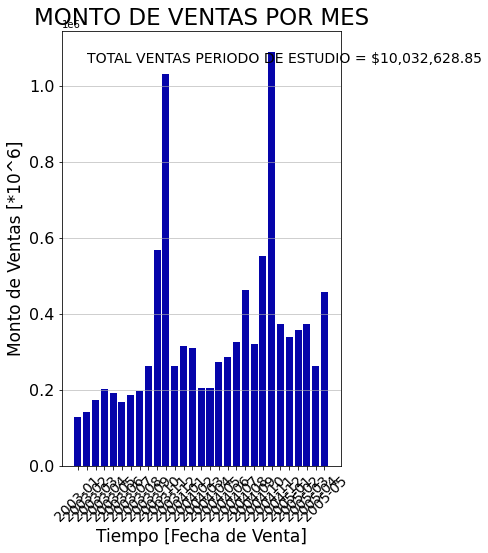

In [17]:

YearM = SalesMonth.index.values
YearM = pd.DataFrame({"YearMonth":YearM})

y_pos = np.arange(len(SalesMonth))
k = YearM['YearMonth']
L = []
for i in YearM['YearMonth']: L.append(str(i)[:7])

x_pos= np.arange(len(SalesMonth))

plt.bar(x_pos, SalesMonth['SALES'], color='#0504aa')
plt.rcParams["figure.figsize"] = (13,9)
plt.xticks(y_pos, L, rotation=45, fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tiempo [Fecha de Venta]', fontsize=17)
plt.ylabel('Monto de Ventas [*10^6]',fontsize=17)
plt.title('MONTO DE VENTAS POR MES', fontsize=23)
plt.tick_params(axis='y', labelsize=16)
plt.text(1,1060000, r'TOTAL VENTAS PERIODO DE ESTUDIO = %s'%(TotalVentas), fontsize = 14)     #dt.datetime(2003,1,1),
plt.show()

(1E) Distribución de los clientes según ciudad. Ciudad donde se ubica la mayor cantidad de clientes.

73
NYC es la ciudad con mayor cantidad de clientes en el periodo de estudio. Allí se ubican 5 clientes.
Las ciudades donde se ubican al menos 2 clientes son 13 y se muestran en la figura; existen al menos 2 clientes dentro de estas ciudades. Las otras 60 ciudades registran un solo cliente cada una.


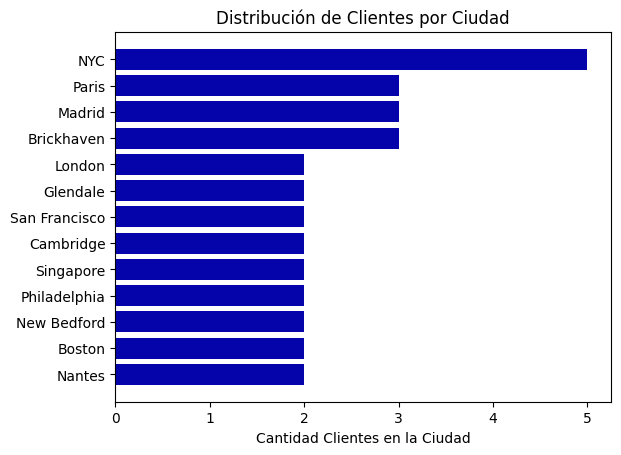

In [54]:
z = Cliente.groupby('CITY').agg('count').sort_values(by="ID_Cliente", ascending=False)
#print(z)
z = z['ID_Cliente']
ZZ = z.index.values
ZZ1 = ZZ[z>1] 
#print(ZZ)
#print(len(ZZ))
#print(ZZ1)

plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(ZZ1))

ax.barh(y_pos,z.iloc[:len(ZZ1)], align='center', color='#0504aa')
ax.set_yticks(y_pos)
ax.set_yticklabels(ZZ1)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Cantidad Clientes en la Ciudad')
ax.set_title('Distribución de Clientes por Ciudad')

CiudadMasClientes = ZZ1[0]
CantMasClientes = z[0]

print(r'%s es la ciudad con mayor cantidad de clientes en el periodo de estudio. \
Allí se ubican %s clientes.'%(CiudadMasClientes,CantMasClientes))

print(r'Las ciudades donde se ubican al menos 2 clientes son %s y se muestran en la figura; existen al menos 2 \
clientes dentro de estas ciudades. Las otras %s ciudades registran un solo cliente cada una.'\
%(len(ZZ1), len(z)-len(ZZ1)))

(1F) Distribución de los clientes según estado. Estado donde se ubica la mayor cantidad de clientes.

16
CA es el estado con mayor cantidad de clientes en el periodo de estudio. Allí se ubican 11 clientes.
Los estados  donde se ubican al menos 2 clientes son 8 y se muestran en la figura; existen al menos 2 clientes dentro de estos estados. Los otras 8 estados registran un solo cliente cada uno.


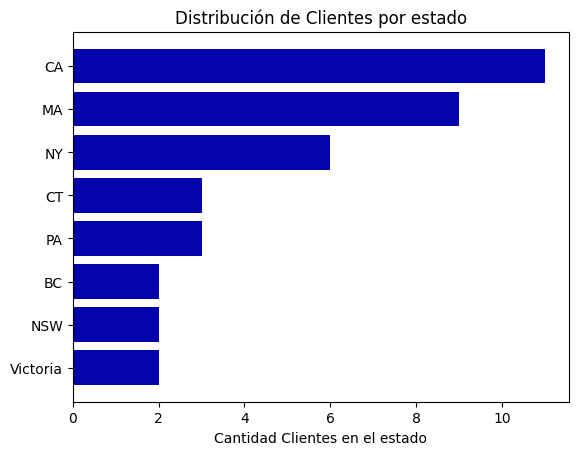

In [55]:
s = Cliente.groupby('STATE').agg('count').sort_values(by="ID_Cliente", ascending=False)
s = s['ID_Cliente']
SS = s.index.values
SS1 = SS[s>1] 

plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(SS1))

ax.barh(y_pos,s.iloc[:len(SS1)], align='center',  color='#0504aa')
ax.set_yticks(y_pos)
ax.set_yticklabels(SS1)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Cantidad Clientes en el estado')
ax.set_title('Distribución de Clientes por estado')

EstadoMasClientes = SS1[0]
CantidadEstadoClientes = s[0]

print(r'%s es el estado con mayor cantidad de clientes en el periodo de estudio. \
Allí se ubican %s clientes.'%(EstadoMasClientes,CantidadEstadoClientes))

print(r'Los estados  donde se ubican al menos 2 clientes son %s y se muestran en la figura; existen al menos 2 \
clientes dentro de estos estados. Los otras %s estados registran un solo cliente cada uno.'\
%(len(SS1), len(s)-len(SS1)))

In [20]:
def self(x):
  t=[]
  for i in x: t=i
  return t

Lineas = pd.merge(OrdenCompleta, Producto, how = "left", on = "PRODUCTCODE")
Lineas = Lineas.groupby('PRODUCTLINE',as_index=False).agg({'PRODUCTLINE': lambda x: self(x), 
                                                  'PRODUCTCODE': lambda x: self(x), 
                                                  'ORDERNUMBER': lambda x: x.count()})
Lineas = Lineas.sort_values(by='ORDERNUMBER', ascending=False)
Lineas

,PRODUCTLINE,PRODUCTCODE,ORDERNUMBER
0,Classic Cars,S700_2824,967
6,Vintage Cars,S50_1341,607
1,Motorcycles,S50_4713,331
2,Planes,S72_1253,306
5,Trucks and Buses,S50_1392,301
3,Ships,S72_3212,234
4,Trains,S50_1514,77


Ver análsis del punto (1) en el informe

# (2) SEGMENTACIÓN RFM

Se usarán las siguientes variables para describir las caracteristicas RFM, en todos los casos se trata de información agregada de acuerdo a cada uno de los clientes:


*   Recency: ORDERDATE. Tiempo desde la última compra hasta la fecha de referencia.
*  Freceuncy: ORDERNUMBER. Cantidad de ordenes generadas en el periodo de estudio.
*  Money: SALES. Cantidad de dinero en compras en el periodo de estudio.



## Puntuación de cada cliente en *Recency, Frecuency, Money*. Histograma de cada combiación de clasificación RFM.

In [21]:
refDate = dt.datetime(2005,5,31)

ODO = Orden.merge(DetalleOrden, on='ORDERNUMBER', how = 'right', indicator = 'TRUE')

h = []
for i in ODO['ORDERDATE']: 
  h.append(pd.to_datetime(i))  
ODO['ORDERDATE'] = h

# Información RFM agregada de acuerdo cada cliente
rfm = ODO.groupby('ID_Cliente', as_index=False).agg({'ORDERDATE': lambda x: (refDate - x.max()).days,  # Recency: tiempo desde la última compra hasta la fecha de referencia.
                                     'ORDERNUMBER': lambda x: len(x), # Frecuency: Cantidad de compras en el periodo de estudio
                                     'SALES': lambda x: x.sum()})    #Money: Cantidad de dinero comprada

rfm.columns = ['ID_Cliente','Recency', 'Frequency', 'Monetary']
rfm.head(5)


,ID_Cliente,Recency,Frequency,Monetary
0,C001,64,20,70488.44
1,C002,264,26,94117.26
2,C003,83,46,153996.13
3,C004,187,7,24179.96
4,C005,22,23,64591.46


In [22]:
rfm['r_percentile'] = rfm['Recency'].rank(pct=True,ascending=False)
rfm['f_percentile'] = rfm['Frequency'].rank(pct=True,ascending=True)
rfm['m_percentile'] = rfm['Monetary'].rank(pct=True,ascending=True)
rfm['r_score'] = pd.qcut(rfm['r_percentile'], 5, labels=range(1,6,1))
rfm['f_score'] = pd.qcut(rfm['f_percentile'], 5, labels=range(1,6,1))
rfm['m_score'] = pd.qcut(rfm['m_percentile'], 5, labels=range(1,6,1))            #REVISAR - REVISAR - REVISAR

rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

rfm.head(5)

,ID_Cliente,Recency,Frequency,Monetary,r_percentile,f_percentile,m_percentile,r_score,f_score,m_score,rfm_score
0,C001,64,20,70488.44,0.771739,0.282609,0.260870,4,2,2,422
1,C002,264,26,94117.26,0.184783,0.543478,0.565217,1,3,3,133
2,C003,83,46,153996.13,0.739130,0.907609,0.902174,4,5,5,455
3,C004,187,7,24179.96,0.500000,0.021739,0.021739,3,1,1,311
4,C005,22,23,64591.46,0.913043,0.396739,0.206522,5,2,1,521


-----------------

In [23]:
q=[0.0, 1/5,2/5,3/5, 4/5,1]
r_quintiles = rfm['Recency'].quantile(q).to_list()
f_quintiles = rfm['Frequency'].quantile(q).to_list()
m_quintiles = rfm['Monetary'].quantile(q).to_list()
quantile_spread = pd.DataFrame(list(zip(r_quintiles, f_quintiles, m_quintiles)), 
                      columns=['Q_Recency','Q_Frequency', 'Q_Monetary'],
                     index = ['min', 'first_part (Q1)','second_part (Q2)','third_part (Q3)', 'forth_part(Q4)','max'])
quantile_spread

,Q_Recency,Q_Frequency,Q_Monetary
min,0.0,3.0,9129.350
first_part (Q1),54.8,18.0,64640.032
second_part (Q2),144.4,23.0,79323.366
third_part (Q3),196.6,27.0,100479.962
forth_part(Q4),257.8,36.0,133744.524
max,508.0,259.0,912294.110


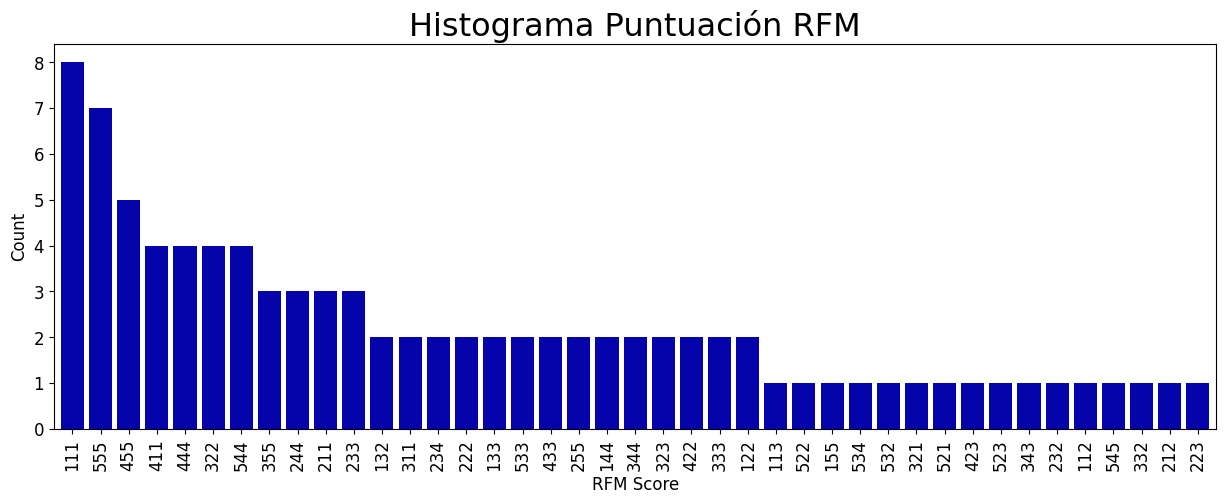

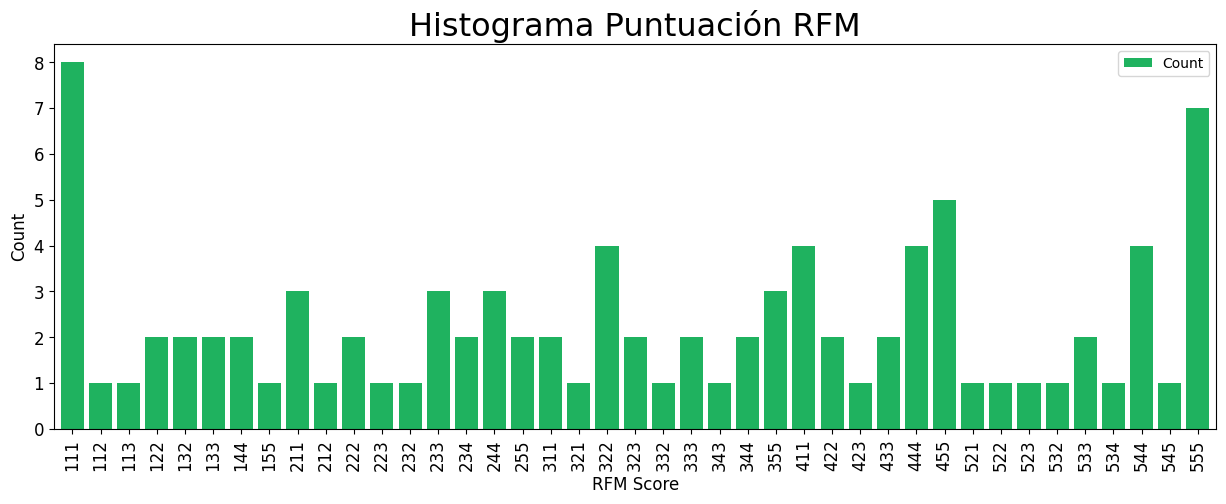

In [24]:
ax = rfm['rfm_score'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12,  color='#0504aa', width=0.82)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.set_title('Histograma Puntuación RFM', fontsize = 23)
plt.show()

ax2 = rfm['rfm_score'].value_counts()
ax2 = pd.DataFrame({'rfm_score':ax2.index,'Count':ax2})
ax2 = ax2.sort_values('rfm_score',ascending=True)

x_pos= np.arange(len(ax2))
col = list([np.repeat('#1fb25f',8)])
col.extend([np.repeat('#0504aa',8)])
col.extend([np.repeat('#1fb25f',8)])
col.extend([np.repeat('#0504aa',8)])
col.extend([np.repeat('#1fb25f',8)])
#col = np.array(col)
w = ['dede']
ax2 = ax2.plot(kind='bar', figsize=(15, 5), fontsize=12,  color=col, width=0.82)
ax2.set_xlabel("RFM Score", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_title('Histograma Puntuación RFM', fontsize = 23)

plt.show()

## Clasificación de los Clientes en 5 categorías

  ID_Cliente  Recency  Frequency   Monetary  r_percentile  f_percentile  \
0       C001       64         20   70488.44      0.771739      0.282609   
1       C002      264         26   94117.26      0.184783      0.543478   
2       C003       83         46  153996.13      0.739130      0.907609   
3       C004      187          7   24179.96      0.500000      0.021739   
4       C005       22         23   64591.46      0.913043      0.396739   

   m_percentile r_score f_score m_score rfm_score  
0      0.260870       4       2       2       422  
1      0.565217       1       3       3       133  
2      0.902174       4       5       5       455  
3      0.021739       3       1       1       311  
4      0.206522       5       2       1       521  
   ID_Cliente  Recency  Frequency   Monetary  r_percentile  f_percentile  \
0        C001       64         20   70488.44      0.771739      0.282609   
1        C002      264         26   94117.26      0.184783      0.543478   
2        

([<matplotlib.axis.XTick at 0x7f0ab9183b90>,
 [Text(0, 0, 'Perdido'),
  Text(0, 0, 'Potencial'),
  Text(0, 0, 'Derrochador'),
  Text(0, 0, 'Leal'),
  Text(0, 0, 'Nuevo')])

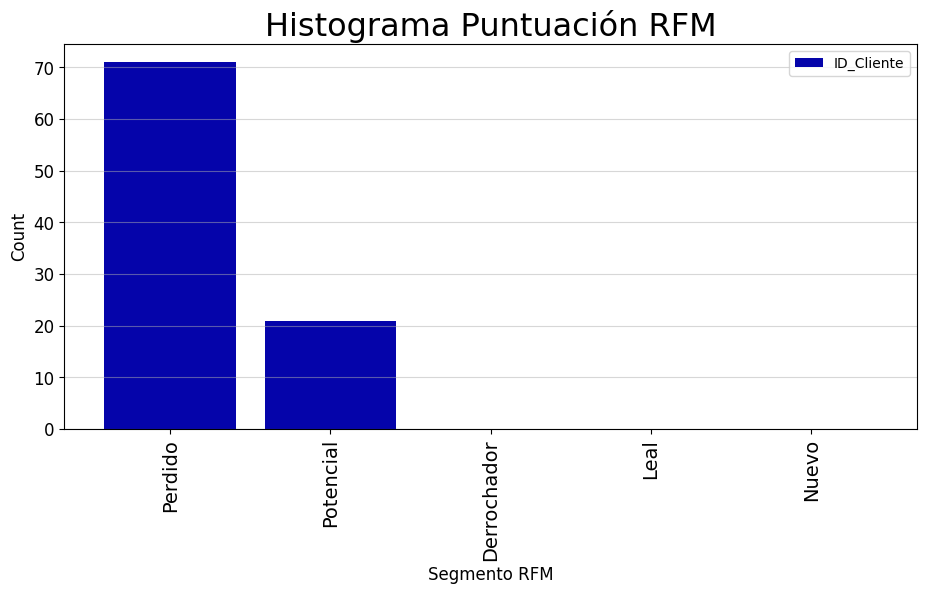

In [25]:
print(rfm.head(5))
L = [] 

for j in rfm['rfm_score']:
  if j in ('444', '445', '454', '455', '544', '545', '554', '555'):
    L.append('Potencial')
  
  elif j[0] in ('1','2','3') or j[1] in ('1','2','3') or j[2] in ('1','2','3'): 
    L.append('Perdido')
  
  elif j[2] == '5': 
    L.append('Derrochador')

  elif j[1] in ('4','5'):
    L.append('Leal')

  elif j[0] in ('4','5'):
    L.append('Nuevo')

  else: L.append('Desclasificado')

rfm['Rfm_Segment'] = L
print(rfm.head(100))
rfm = pd.DataFrame(rfm)

segmento = rfm.groupby('Rfm_Segment', as_index=False).count()
segmento = segmento.iloc[:,:2]
ls = pd.DataFrame({'Rfm_Segment': ['Derrochador','Leal','Nuevo'], 'ID_Cliente':[0,0,0]})
segmento = segmento.append(ls)
print(segmento)

ax3 = segmento.plot(kind='bar', figsize=(11, 5), fontsize=12,  color='#0504aa', width=0.82)
ax3.set_xlabel("Segmento RFM", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)
ax3.set_title('Histograma Puntuación RFM', fontsize = 23)
plt.grid(axis='y', alpha=1.5)
plt.xticks(np.arange(len(segmento)),segmento['Rfm_Segment'],fontsize=14)




# (3) SEGMENTACIÓN POR CLUSTERING

Se utilizó método kmeans para la segmentaciñon RFM.

In [26]:
# Función para verificar asimetría (skewness)
def check_skew(df_skew, column):
    skew = sts.skew(df_skew[column])
    skewtest = sts.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column], color='#0504aa', bins=35)
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 0.7673634065510251, : SkewtestResult(statistic=2.9211180198423654, pvalue=0.003487776773306202)



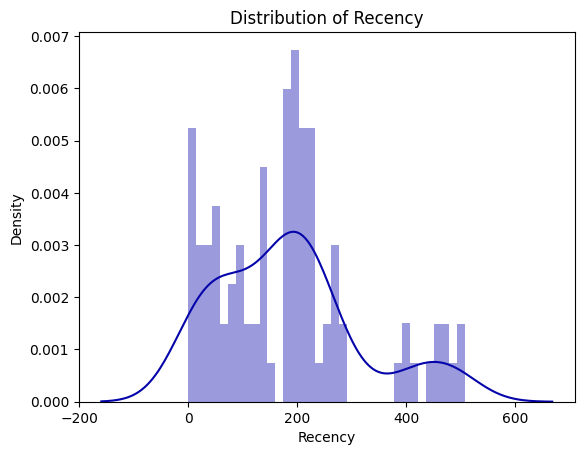

In [27]:
# Verificación asimetría (skewness) de la recencia (R)
check_skew(rfm, 'Recency')
print('')



Frequency's: Skew: 5.653296151215707, : SkewtestResult(statistic=9.653805927007603, pvalue=4.736448574059028e-22)



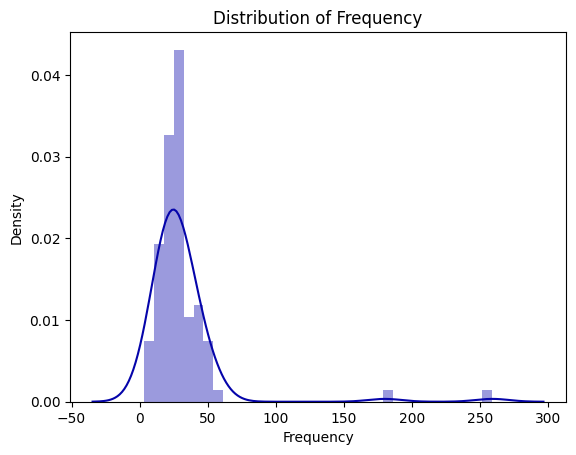

In [28]:
# Verificación asimetría (skewness) de la frecuencia (F)
check_skew(rfm, 'Frequency')
print('')

Monetary's: Skew: 5.570979953309047, : SkewtestResult(statistic=9.598373148084844, pvalue=8.121615124734495e-22)


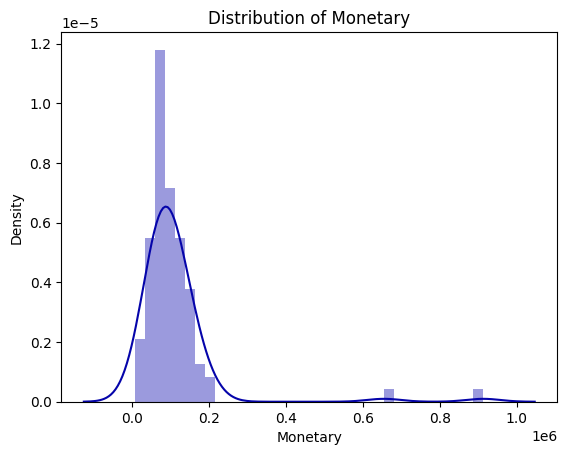

In [29]:
# Verificación asimetría (skewness) del Valor Monetario (M)
check_skew(rfm, 'Monetary')

In [30]:
rfm.iloc[:,0:4]

,ID_Cliente,Recency,Frequency,Monetary
0,C001,64,20,70488.44
1,C002,264,26,94117.26
2,C003,83,46,153996.13
3,C004,187,7,24179.96
4,C005,22,23,64591.46
...,...,...,...,...
87,C088,53,29,118008.27
88,C089,274,31,117713.56
89,C090,207,25,88041.26
90,C091,193,19,75754.88


Recency's: Skew: -4.289842155943261, : SkewtestResult(statistic=-8.614999055387694, pvalue=6.994217233034114e-18)
Frequency's: Skew: 0.3166178065812943, : SkewtestResult(statistic=1.300477990062577, pvalue=0.193437195098201)
Monetary's: Skew: 0.1585134941295189, : SkewtestResult(statistic=0.66039000000521, pvalue=0.5090035877862018)


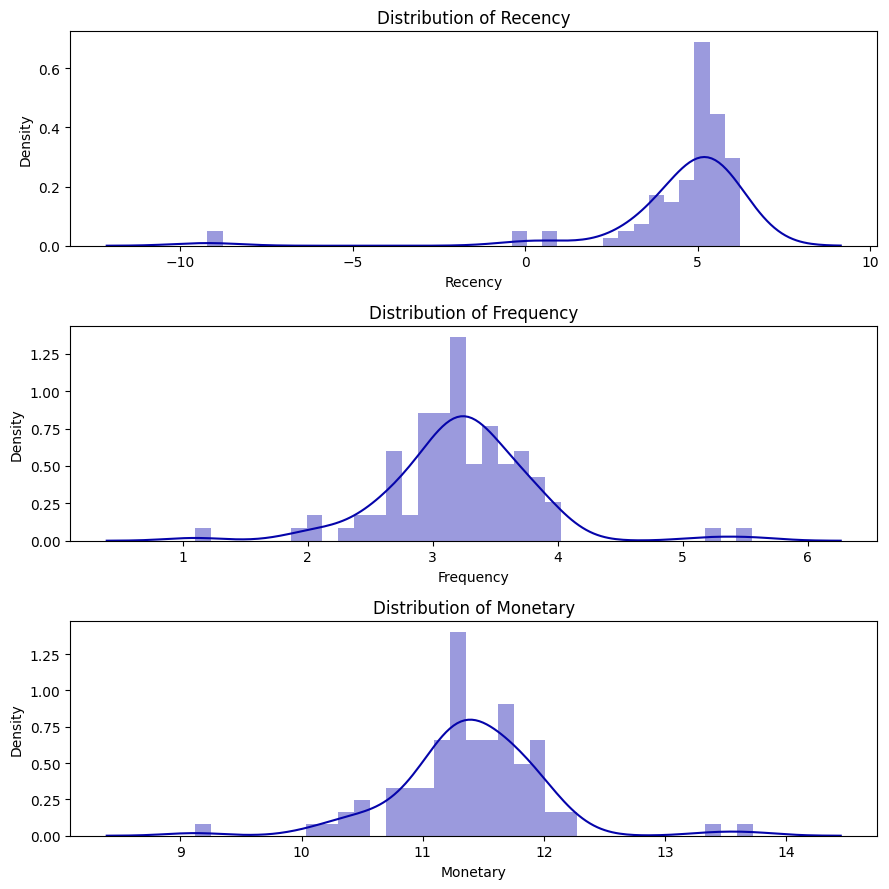

In [31]:
#Remoción de la asimetría
rfm_log = np.log(rfm.iloc[:,1:4]+0.0001)
plt.figure(figsize=(9, 9))
plt.subplot(3, 1, 1)

check_skew(rfm_log,'Recency')
plt.subplot(3, 1, 2)

check_skew(rfm_log,'Frequency')
plt.subplot(3, 1, 3)

check_skew(rfm_log,'Monetary')
plt.tight_layout()

In [51]:
scaler = StandardScaler()
scaler.fit(rfm_log)
RFM_Table_scaled = scaler.transform(rfm_log)
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns = rfm_log.columns)
RFM_Table_scaled

,Recency,Frequency,Monetary
0,-0.139597,-0.391908,-0.384655
1,0.453727,0.061123,0.100944
2,-0.030753,1.046299,0.928021
3,0.309342,-2.204655,-2.181842
4,-0.586699,-0.150578,-0.531407
5,0.300289,1.354851,1.375425
6,0.116564,-0.888656,-0.670195
7,0.399626,-0.573837,-0.525103
8,-0.210733,0.126290,0.083964
9,0.291036,-1.974085,-2.029259


Se usa el método del codo (Elbow Method) para averiguar qué cantidad de clusters K es óptima segñun los datos.

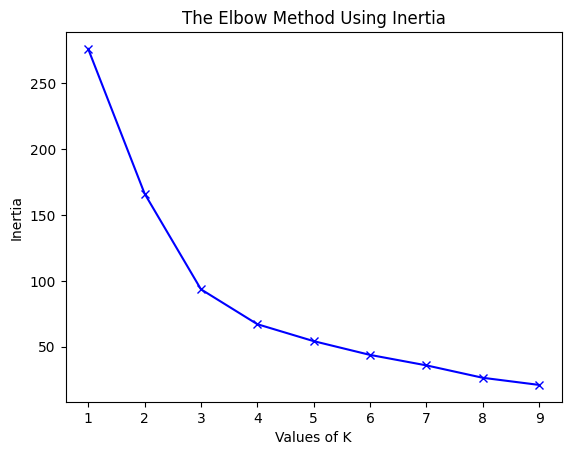

In [52]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled) 
    kmeanModel.fit(RFM_Table_scaled)     
      
    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method Using Inertia')
plt.show()

K = 3 parece un valor apropiado, pues allí es donde la gráfica presenta mayor curvatura. Sin embargo, a continuación se ecxploran las gráficas 'aplanadas' que resultan de usar K=3, K=4 y K=5. Estas son gráficas que corresponden a una tridimensionalidad, pero se 'aplanan' para poder ser representadas en 2 dimensiones.

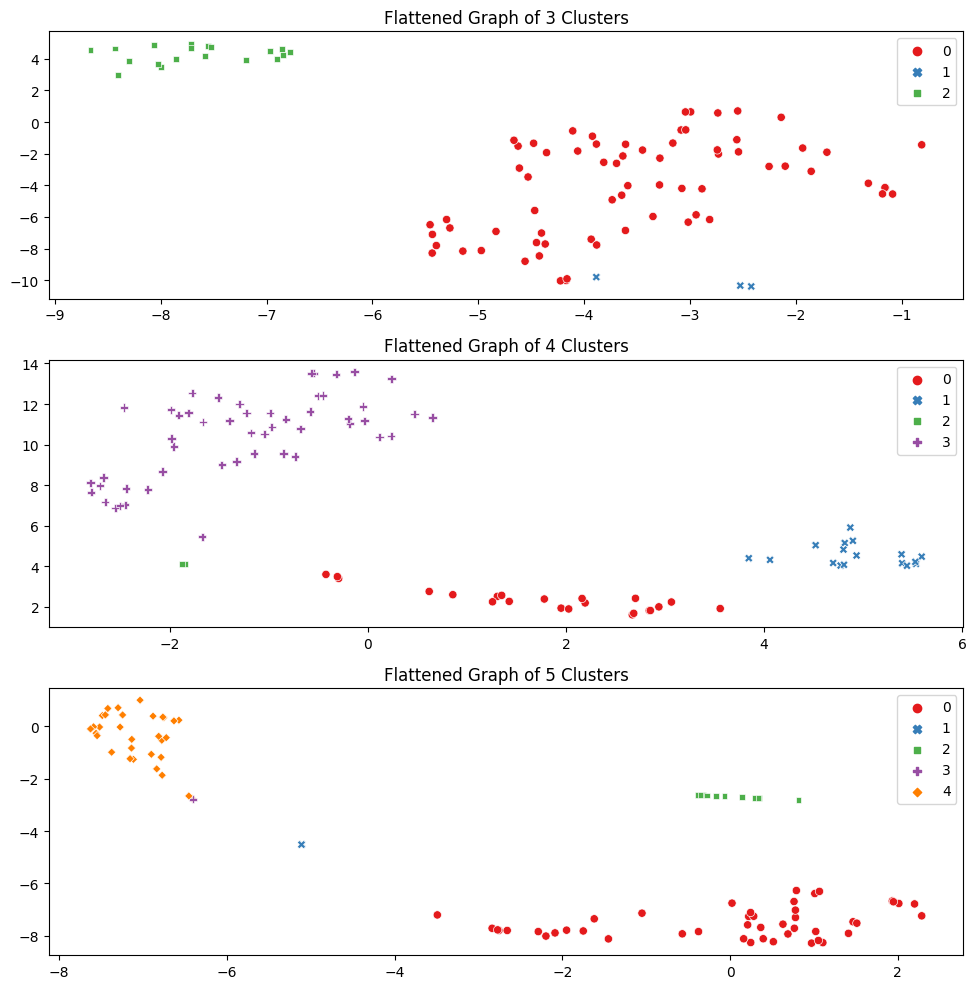

In [34]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)
                                        
    cluster_labels = kmeans.labels_ # Extrae las etiquetas de los clusters
        
    # Crea una etiqueta de cluster in el conjunto de datos original
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
     
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, rfm_log)
plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, rfm_log)
plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, rfm_log)
plt.tight_layout()

Se efectúan los 'gráficos de serpiente' (*snake plots*) correspondientes a cada valor de K (3, 4,5).

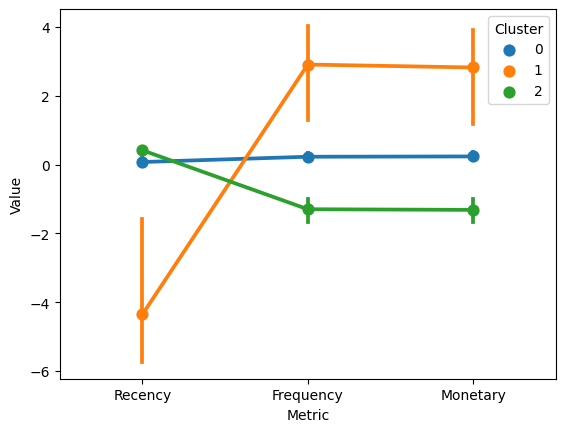

In [35]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=rfm.index, 
                                       columns=rfm.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']
    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['ID_Cliente', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

snake_plot(RFM_Table_scaled, df_rfm_k3, rfm_log)

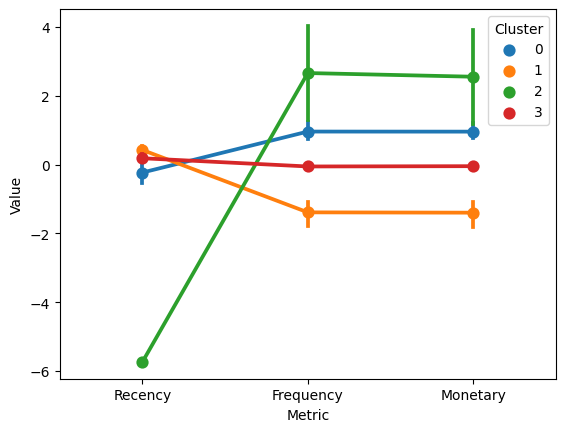

In [36]:
snake_plot(RFM_Table_scaled, df_rfm_k4, rfm_log)

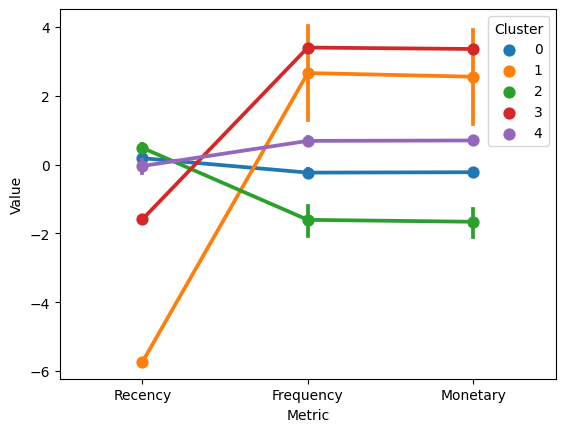

In [37]:
snake_plot(RFM_Table_scaled, df_rfm_k5, rfm_log)

In [38]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': ['mean', 'count']
        }).round(0)
    
    return df_new

rfm_values(df_rfm_k3)


Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           5.0       3.0     12.0    70
1          -6.0       5.0     13.0     3
2           5.0       2.0     11.0    19

In [39]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           4.0       4.0     12.0    22
1           6.0       2.0     11.0    17
2          -9.0       5.0     13.0     2
3           5.0       3.0     11.0    51

In [40]:
rfm_values(df_rfm_k5)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0           5.0       3.0     11.0    46
1          -9.0       5.0     13.0     2
2           6.0       2.0     10.0    12
3           1.0       5.0     13.0     1
4           4.0       4.0     12.0    31

 # (4) MODELO DE SISTEMA DE RECOMENDACIÓN 

In [41]:
ClienteOrden = pd.merge(DetalleOrden, Cliente, how = "left", on = "ID_Cliente").sort_values(by = 'ID_Cliente', ascending = True)
pd.set_option('display.max_columns', None)

ClienteOrden = ClienteOrden.sort_values(by = ['ID_Cliente', 'PRODUCTCODE'], ascending = True)

ClienteProducto = ClienteOrden.groupby(['ID_Cliente', 'ORDERNUMBER'], as_index=False).agg({'ID_Cliente': lambda x: self(x), 
                                                                                           'PRODUCTCODE': lambda x: self(x),                                                                                            
                                                                                           'ORDERNUMBER':lambda x: x.count()})

ClienteProducto = ClienteProducto.sort_values(by=['ID_Cliente','ORDERNUMBER'], ascending=[True,False])
ClienteProducto.columns = ['ID_Cliente', 'PRODUCTCODE', 'Quantity_of_Orders']
ClienteProducto.head(5)

,ID_Cliente,PRODUCTCODE,Quantity_of_Orders
1,C001,S72_1253,12
2,C001,S72_3212,5
0,C001,S18_3232,3
3,C002,S24_4258,17
4,C002,S72_3212,9


Ahora, dado que la cantidad de productos no es muy grande, no resulta computacionalmente muy costoso crear un DataFrame que almacene los 3 productos más cercanos hacia arriba en precio, y demás condiciones descritas en el informe. 

Primero, se construyeron 7 variables de tipo DataFrame, una por cada línea de producto, en las cuales se ordenaron los productos de cada de acuerdo a su precio en orden ascendente.

In [42]:
RecomProd = pd.merge(OrdenCompleta, Producto, how = "left", on = "PRODUCTCODE")
RecomProd = RecomProd.iloc[:,[15, 6,3]]
RecomProd = RecomProd.groupby('PRODUCTCODE', as_index = False).agg({ 'PRODUCTLINE': lambda x: self(x), 
                                                   'PRODUCTCODE': lambda x: self(x), 
                                                   'PRICEEACH':   lambda x: x.mean()})
RecomProd = RecomProd.sort_values(by=['PRODUCTLINE', 'PRICEEACH'])

RR = RecomProd.groupby('PRODUCTLINE', as_index = False).agg({ 'PRODUCTLINE': lambda x: self(x), 
                                                              'PRODUCTCODE': lambda x: x.count()})
RR.columns = ['PRODUCTLINE', 'QUANTITY_PRODUCTS']
RR

,PRODUCTLINE,QUANTITY_PRODUCTS
0,Classic Cars,37
1,Motorcycles,13
2,Planes,12
3,Ships,9
4,Trains,3
5,Trucks and Buses,11
6,Vintage Cars,24


In [43]:
pd.merge(DetalleOrden,Producto, how= 'left',on='PRODUCTCODE').groupby('PRODUCTLINE').agg({'PRODUCTLINE': lambda x: self(x),
                                                                                          'PRICEEACH': lambda x: x.mean()})\
                                                                                          .sort_values(by='PRICEEACH')

,PRODUCTLINE,PRICEEACH
PRODUCTLINE,,
Trains,Trains,75.654675
Vintage Cars,Vintage Cars,78.148204
Planes,Planes,81.740915
Motorcycles,Motorcycles,82.997553
Ships,Ships,83.855470
Classic Cars,Classic Cars,87.335781
Trucks and Buses,Trucks and Buses,87.527940


In [44]:
import inspect
LL =[]
f0, f1 = 0,0
for i in RR['PRODUCTLINE']:
  f1 = int(RR['QUANTITY_PRODUCTS'][RR['PRODUCTLINE']==i].values) + f0  
  Tabla = pd.DataFrame(RecomProd.iloc[f0:f1,:])
  f0 = f1
  LL.append(Tabla)        # lista de Líneas de producto con cada producto y su precio 

Classic = LL[0]
Motor   = LL[1]
Planes  = LL[2]
Ships   = LL[3]
Trains  = LL[4]
Buses   = LL[5]
Vintage = LL[6]

AA = [[Classic], [Motor], [Planes], [Ships], [Trains],[Buses], [Vintage]]

def recom(LINE, k):
    et1 = pd.DataFrame(LINE.iloc[1:,1], columns = ['PRODUCTCODE']).append({'PRODUCTCODE':LINE.iloc[-2,1]},  ignore_index=True)
    L = pd.concat([LINE.reset_index(drop=True), et1], axis=1)

    et2 = pd.DataFrame(L.iloc[2:,1], columns = ['PRODUCTCODE']).append({'PRODUCTCODE':LINE.iloc[-2,1]},  ignore_index=True)
    et2 = et2.append({'PRODUCTCODE':LINE.iloc[-3,1]},  ignore_index=True)
    L = pd.concat([L.reset_index(drop=True), et2], axis=1)

    et3 = pd.DataFrame(L.iloc[3:,1], columns = ['PRODUCTCODE']).append({'PRODUCTCODE':LINE.iloc[-2,1]},  ignore_index=True)
    et3 = et3.append({'PRODUCTCODE':LINE.iloc[-3,1]},  ignore_index=True)
    if k != 1:
        et3 = et3.append({'PRODUCTCODE':LINE.iloc[-4,1]},  ignore_index=True)
    else: et3 = et3.append({'PRODUCTCODE':Vintage.iloc[-4,1]},  ignore_index=True)
    L = pd.concat([L.reset_index(drop=True), et3], axis=1)
    L.columns= ['PRODUCETLINE', 'PRODUCTCODE','PRICEEACH','ProdRec1','ProdRec2','ProdRec3']

    return L
    

Classic = recom(Classic,0)
Motor  = recom(Motor,0)
Planes = recom(Planes,0)
Ships  = recom(Ships,0) 
Trains = recom(Trains,1)
Buses  = recom(Buses,0) 
Vintage= recom(Vintage,0)

All_LinesRec = Classic.append(Motor, ignore_index=True)\
                    .append(Planes, ignore_index=True)\
                    .append(Ships, ignore_index=True)\
                    .append(Trains, ignore_index=True)\
                    .append(Buses, ignore_index=True)\
                    .append(Vintage, ignore_index=True)

All_LinesRec

,PRODUCETLINE,PRODUCTCODE,PRICEEACH,ProdRec1,ProdRec2,ProdRec3
0,Classic Cars,S24_2840,44.010357,S24_2972,S24_1628,S24_1444
1,Classic Cars,S24_2972,45.498519,S24_1628,S24_1444,S24_3371
2,Classic Cars,S24_1628,52.849167,S24_1444,S24_3371,S24_1046
3,Classic Cars,S24_1444,61.533571,S24_3371,S24_1046,S18_4933
4,Classic Cars,S24_3371,62.048846,S24_1046,S18_4933,S12_3990
...,...,...,...,...,...,...
104,Vintage Cars,S18_3320,94.165385,S18_2795,S18_3140,S18_2325
105,Vintage Cars,S18_2795,95.105769,S18_3140,S18_2325,S18_1749
106,Vintage Cars,S18_3140,97.225600,S18_2325,S18_1749,S18_2325
107,Vintage Cars,S18_2325,98.547200,S18_1749,S18_2325,S18_3140


In [45]:
CP = ClienteProducto.groupby('ID_Cliente', as_index= False).agg({'ID_Cliente': lambda x: self(x), 
                                                                   'PRODUCTCODE': lambda x: self(x), 
                                                                   'Quantity_of_Orders': lambda x: x.count()})
CP.columns = ['ID_Cliente','PRODCODE', 'CountCodes']

DropList = []
tt = 0
for i in range(len(CP)):
  for j in range(CP['CountCodes'][i]):
      if j>=2:
          DropList.extend([tt+j])
      else: None
  tt = tt+CP['CountCodes'][i]

ClienteProductoMOD = ClienteProducto.reset_index()
ClienteProductoMOD = ClienteProductoMOD.drop(DropList)

ClienteProductoMOD

,index,ID_Cliente,PRODUCTCODE,Quantity_of_Orders
0,1,C001,S72_1253,12
1,2,C001,S72_3212,5
3,3,C002,S24_4258,17
4,4,C002,S72_3212,9
5,5,C003,S24_3432,14
...,...,...,...,...
299,299,C090,S50_4713,9
301,303,C091,S700_1138,6
302,304,C091,S24_2300,6
305,306,C092,S24_4258,10


In [46]:
Recomendaciones = ClienteProducto.groupby('ID_Cliente', as_index= False).agg({'ID_Cliente': lambda x: self(x)})


#Recomendaciones = pd.concat([Recomendaciones.reset_index(drop=True), LineaFav1], axis=1)
DD = pd.merge(ClienteProductoMOD, Producto[['PRODUCTLINE', 'PRODUCTCODE']],  how = "left", on = "PRODUCTCODE")#.sort_values(by = 'ORDERNUMBER', ascending = False)
#print(Recomendaciones)

w = pd.merge(DD, Recomendaciones,  how = "left", on = "ID_Cliente")#.sort_values(by = 'ORDERNUMBER', ascending = False)
w1 = pd.merge(w, All_LinesRec,  how = "left", on = 'PRODUCTCODE')#.sort_values(by = 'ORDERNUMBER', ascending = False)

w1

,index,ID_Cliente,PRODUCTCODE,Quantity_of_Orders,PRODUCTLINE,PRODUCETLINE,PRICEEACH,ProdRec1,ProdRec2,ProdRec3
0,1,C001,S72_1253,12,Planes,Planes,55.897037,S24_2841,S24_3949,S700_4002
1,2,C001,S72_3212,5,Ships,Ships,63.865769,S700_1138,S700_2610,S18_3029
2,3,C002,S24_4258,17,Vintage Cars,Vintage Cars,92.874231,S18_2949,S18_3856,S18_3320
3,4,C002,S72_3212,9,Ships,Ships,63.865769,S700_1138,S700_2610,S18_3029
4,5,C003,S24_3432,14,Classic Cars,Classic Cars,93.649565,S12_1108,S18_1984,S10_4757
...,...,...,...,...,...,...,...,...,...,...
178,299,C090,S50_4713,9,Motorcycles,Motorcycles,84.011200,S10_1678,S32_1374,S10_2016
179,303,C091,S700_1138,6,Ships,Ships,70.566923,S700_2610,S18_3029,S700_1938
180,304,C091,S24_2300,6,Trucks and Buses,Trucks and Buses,100.000000,S12_1666,S18_4600,S50_1392
181,306,C092,S24_4258,10,Vintage Cars,Vintage Cars,92.874231,S18_2949,S18_3856,S18_3320


In [49]:
def selfie(x):
  t=[]
  for i in x: t.append(i)
  return t[0]
#DefRec1=
#DefRec2=
#Defrec3=
w2 = w1.groupby('ID_Cliente', as_index=False).agg({'ProdRec1': lambda x: selfie(x),
                                   'ProdRec2': lambda x: selfie(x)})
print(len(w1))
#Recomendaciones = pd.concat([w1, w2])

w2.columns = ['ID_Cliente','Recomendadcion1','Recomendadcion2']


183


In [50]:
pd.set_option('max_rows', None)

ClienteProductoLinea = pd.merge(ClienteProducto, Producto, how = "left", on = "PRODUCTCODE")#.sort_values(by = 'ID_Cliente', ascending = True)
ProdLineCount = ClienteProductoLinea.reset_index().groupby('ID_Cliente', as_index= False).agg({'ID_Cliente': lambda x: self(x), 
                                                                   'PRODUCTLINE': lambda x: x.count()})

ClienteProductoLinea = ClienteProductoLinea.reset_index()
ProductoRecomendado3 = []
for i in range(len(w2)):
    if i == len(w2)-1:
      i = i-1
    if ProdLineCount['PRODUCTLINE'][i]>1:
        ProductoRecomendado3.append(w1['ProdRec1'][2*i+1])
    else: 
        ProductoRecomendado3.append(w1['ProdRec1'][2*i])

ProductoRecomendado3 = pd.DataFrame(ProductoRecomendado3, columns=['Recomendacion3'])

RECOMENDACIONES = pd.concat([w2.reset_index(drop=True),ProductoRecomendado3], axis=1)
RECOMENDACIONES


,ID_Cliente,Recomendadcion1,Recomendadcion2,Recomendacion3
0,C001,S24_2841,S24_3949,S700_1138
1,C002,S18_2949,S18_3856,S700_1138
2,C003,S12_1108,S18_1984,S10_1678
3,C004,S24_1444,S24_3371,S18_3782
4,C005,S18_2949,S18_3856,S24_2841
5,C006,S18_2581,S24_1785,S18_2581
6,C007,S700_1691,S700_2466,S18_2248
7,C008,S24_2887,S24_3432,S24_2300
8,C009,S10_1678,S32_1374,S10_1678
9,C010,S24_2841,S24_3949,S18_3320
